# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Exploratory Data Analysis

In [2]:
sales = pd.read_csv("Train.csv")
sales.shape

(8523, 12)

In [3]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Dropping identifier columns
sales.drop(columns=["Item_Identifier","Outlet_Identifier"], axis=1, inplace=True)

In [6]:
sales.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Dealing with missing values

In [8]:
sales['Item_Weight'].fillna(sales['Item_Weight'].median(), inplace=True)

In [9]:
# Dropping missing values fron Outlet size
sales = sales.dropna(subset='Outlet_Size')

In [10]:
sales.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
sales.duplicated().sum()

0

In [12]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.827195,0.064505,141.256859,1995.794373,2322.688445
std,4.075754,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,9.800000,0.026681,94.012000,1987.000000,974.731200
50%,12.600000,0.052811,143.178600,1997.000000,1928.156800
75%,15.700000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
sales['Outlet_Establishment_Year'] = pd.to_datetime(sales['Outlet_Establishment_Year'], format='%Y')

In [14]:
sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3641
Regular    2076
LF          233
reg          82
low fat      81
Name: count, dtype: int64

We can see that there is an error in recording the data where low fat is represented by LF and low fat and Regular is represented by Reg as well. We must replace these value with a uniform representation

In [15]:
#Cleaning Item_Fat_Content
replace = {"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"}
for i, j in replace.items():
    sales['Item_Fat_Content']=sales['Item_Fat_Content'].str.replace(i,j)

In [16]:
sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3955
Regular    2158
Name: count, dtype: int64

# Univariate Analysis
- Histogram and Countplots
- The major goal here is to check how the data is distributed

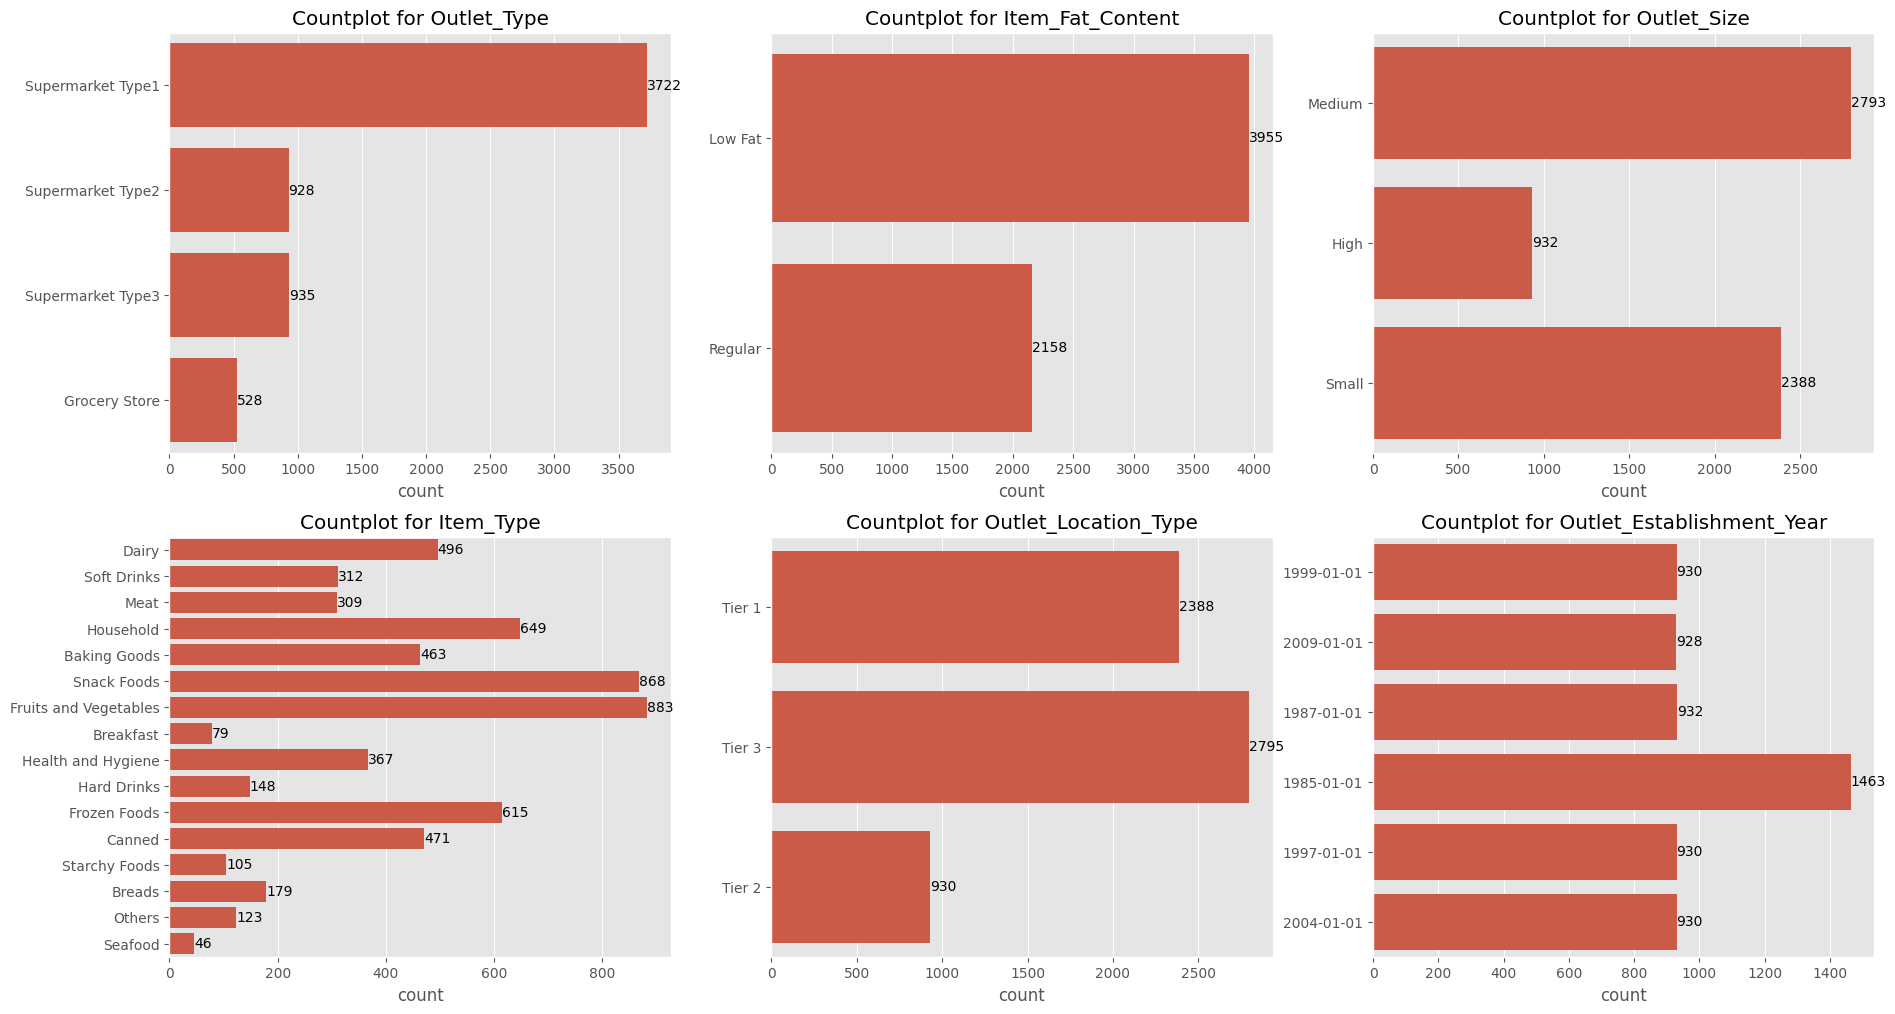

In [17]:
categorical_features = ['Outlet_Type','Item_Fat_Content','Outlet_Size','Item_Type', 'Outlet_Location_Type', 'Outlet_Establishment_Year']
plt.figure(figsize=(22,12))

for i in enumerate(categorical_features):
    plt.subplot(2,3, i[0]+1)
    ax = sns.countplot(sales[i[1]])
    for j in ax.containers:
        ax.bar_label(j)
    ax.set_title(f"Countplot for {i[1]}")
    ax.set_ylabel("")
plt.show()

- Except for outlet_Type and Item_Type most of our other categorical variables seem to have only minor data imbalance.
- Item_Type needs to be combined so that small frequency of item type are represented as "Others"

# Ordinal Encoding features

In [18]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder(categories=[['Small','Medium','High'],['Tier 3','Tier 2','Tier 1'],['Low Fat','Regular']])

In [19]:
sales[['Outlet_Size','Outlet_Location_Type','Item_Fat_Content']] = ord_encoder.fit_transform(sales[['Outlet_Size','Outlet_Location_Type','Item_Fat_Content']])

In [20]:
sales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0.0,0.016047,Dairy,249.8092,1999-01-01,1.0,2.0,Supermarket Type1,3735.1380
1,5.920,1.0,0.019278,Soft Drinks,48.2692,2009-01-01,1.0,0.0,Supermarket Type2,443.4228
2,17.500,0.0,0.016760,Meat,141.6180,1999-01-01,1.0,2.0,Supermarket Type1,2097.2700
4,8.930,0.0,0.000000,Household,53.8614,1987-01-01,2.0,0.0,Supermarket Type1,994.7052
5,10.395,1.0,0.000000,Baking Goods,51.4008,2009-01-01,1.0,0.0,Supermarket Type2,556.6088


# Checking Linear Regression Assumption
- Linear relationship
- Multivariate Normality
- Multicollearity
- No Autocorrelation
- No Heteroscedasticity

# Histogram

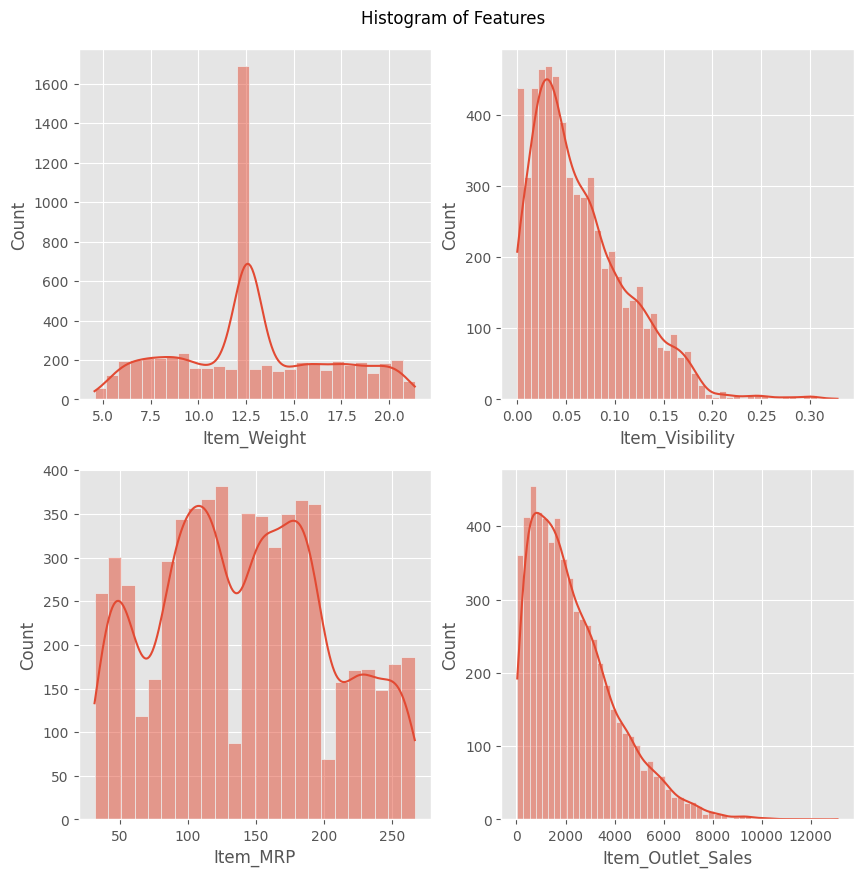

In [21]:
# Checking distribution of numeric features

numeric_features = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]
plt.figure(figsize=(10,10))
plt.suptitle("Histogram of Features", y = 0.92)
for i in enumerate(numeric_features):
    plt.subplot(2,2, i[0]+1)
    ax = sns.histplot(sales[i[1]], kde=True)
plt.show()

- We can see that the data is not distributed normally.
- Item visibility and outlet sales are right tailed while
- Item_Weight has data distribution that has peaked in the middle which was caused as the mean was used to replace the missing values  
- Item_MRP has thin tailed

In [22]:
sales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0.0,0.016047,Dairy,249.8092,1999-01-01,1.0,2.0,Supermarket Type1,3735.1380
1,5.920,1.0,0.019278,Soft Drinks,48.2692,2009-01-01,1.0,0.0,Supermarket Type2,443.4228
2,17.500,0.0,0.016760,Meat,141.6180,1999-01-01,1.0,2.0,Supermarket Type1,2097.2700
4,8.930,0.0,0.000000,Household,53.8614,1987-01-01,2.0,0.0,Supermarket Type1,994.7052
5,10.395,1.0,0.000000,Baking Goods,51.4008,2009-01-01,1.0,0.0,Supermarket Type2,556.6088


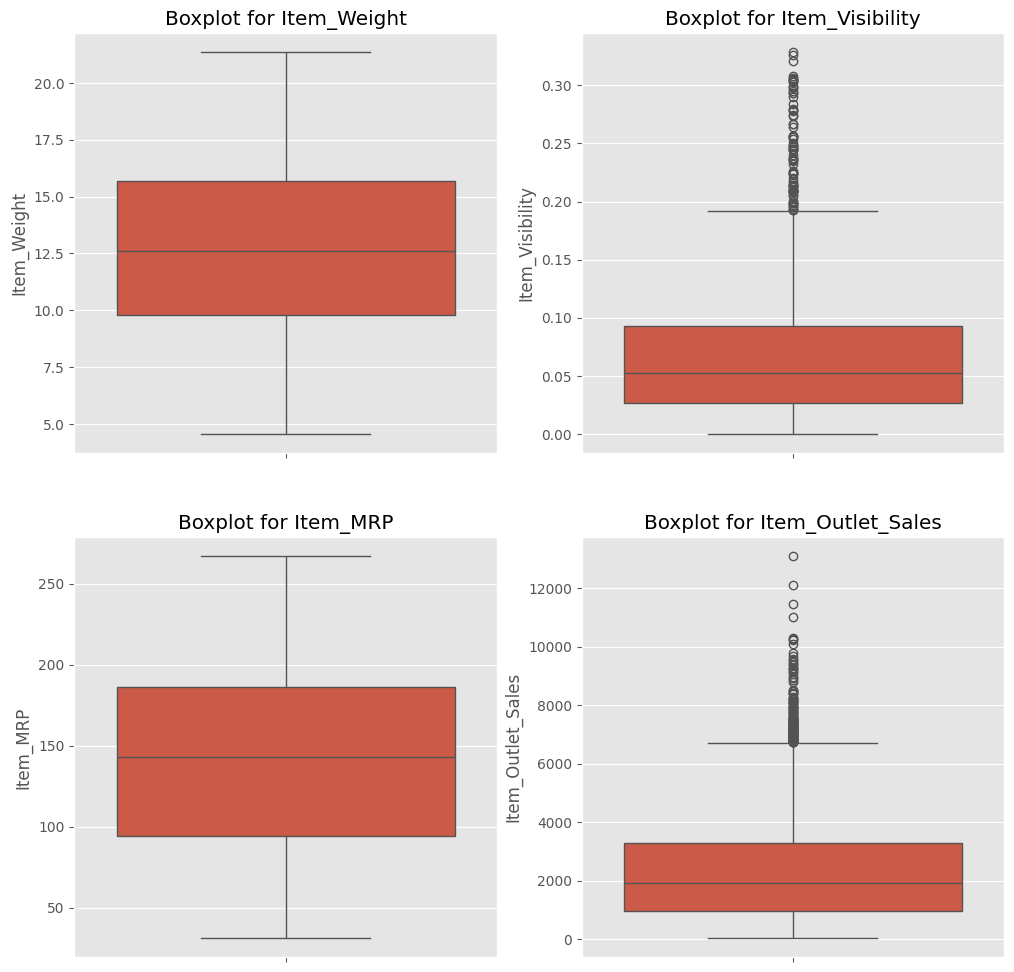

In [23]:
# Checking for outliers
numeric_features = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]

plt.figure(figsize=(12,12))

for i in enumerate(numeric_features):
    plt.subplot(2,2, i[0]+1)
    ax = sns.boxplot(sales[i[1]])
    ax.set_title(f"Boxplot for {i[1]}")
plt.show()

- Item visibility and outlet sales have a great deal of outlier

# Capping Outliers with IQR

In [24]:

p_25 = sales["Item_Visibility"].quantile(0.25)
p_75 = sales["Item_Visibility"].quantile(0.75)
iqr = p_75 - p_25
up_lim = p_75 + 1.5 * iqr
low_lim = p_25 - 1.5 * iqr

In [25]:

sales['Item_Visibility'] = np.where(
    sales['Item_Visibility'] > up_lim,
    up_lim,
    np.where(
        sales['Item_Visibility']< low_lim,
        low_lim,
        sales['Item_Visibility']
    ))

# Function Transformation

In [26]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p, validate=True)

In [27]:
Sqrt_Item_Visibility = np.sqrt(sales['Item_Visibility'])
Log_Item_MRP = log_transformer.fit_transform(sales[['Item_MRP']])
Log_Item_Weight = log_transformer.fit_transform(sales[['Item_Weight']])

In [28]:
sales['Item_Visibility'] = Sqrt_Item_Visibility
sales['Item_MRP'] = Log_Item_MRP
sales['Item_Weight'] = Log_Item_Weight

# Transformed Data Distribution

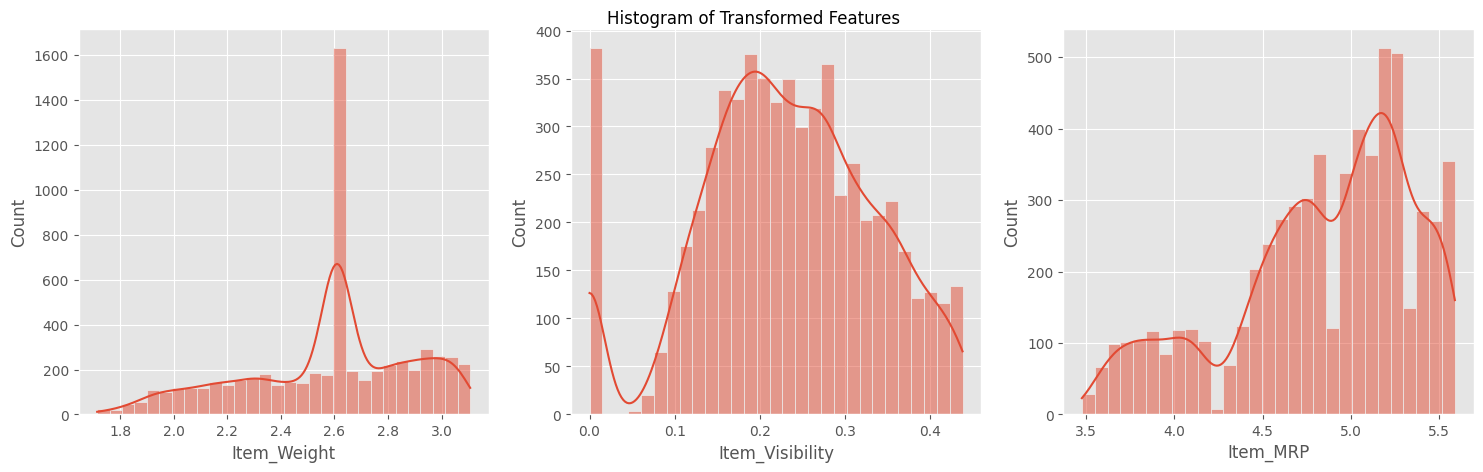

In [29]:
trns_features = ["Item_Weight", "Item_Visibility", "Item_MRP"]
plt.figure(figsize=(18,5))
plt.suptitle("Histogram of Transformed Features", y = 0.92)
for i in enumerate(trns_features):
    plt.subplot(1,3, i[0]+1)
    ax = sns.histplot(sales[i[1]], kde=True)
plt.show()

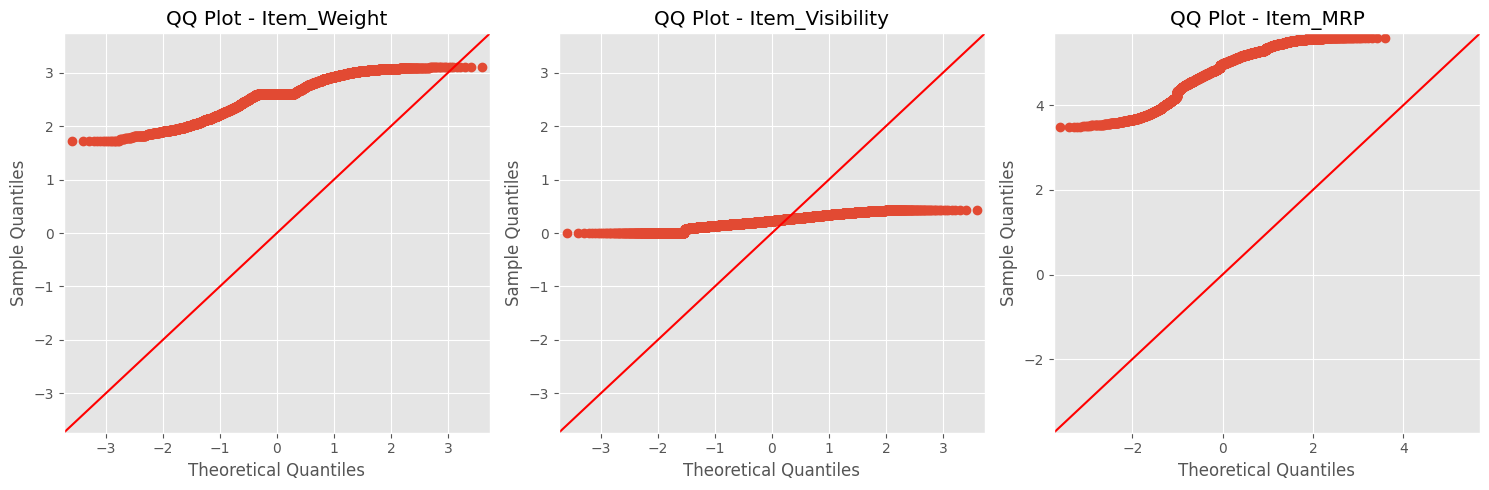

In [30]:
import statsmodels.api as sm

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Create QQ plots for each dataset
sm.qqplot(sales['Item_Weight'], line='45', ax=axs[0])
axs[0].set_title('QQ Plot - Item_Weight')

sm.qqplot(sales['Item_Visibility'], line='45', ax=axs[1])
axs[1].set_title('QQ Plot - Item_Visibility')

sm.qqplot(sales['Item_MRP'], line='45', ax=axs[2])
axs[2].set_title('QQ Plot - Item_MRP')

plt.tight_layout()
plt.show()

**As we can see our numeric data is not distributed normally.** 

In [31]:
sales.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113,6113.000000,6113.000000,6113.000000
mean,2.579492,0.353018,0.230118,4.839975,1995-10-18 09:04:37.376083840,0.761819,0.933421,2322.688445
min,1.714698,0.000000,0.000000,3.474758,1985-01-01 00:00:00,0.000000,0.000000,33.955800
25%,2.379546,0.000000,0.163344,4.554003,1987-01-01 00:00:00,0.000000,0.000000,974.731200
50%,2.610070,0.000000,0.229807,4.971053,1997-01-01 00:00:00,1.000000,1.000000,1928.156800
75%,2.815409,1.000000,0.304687,5.230533,2004-01-01 00:00:00,1.000000,2.000000,3271.075400
max,3.106826,1.000000,0.438251,5.590570,2009-01-01 00:00:00,2.000000,2.000000,13086.964800
std,0.315765,0.477947,0.104077,0.519010,NaN,0.697463,0.918461,1741.592093


# Bivariate Analysis

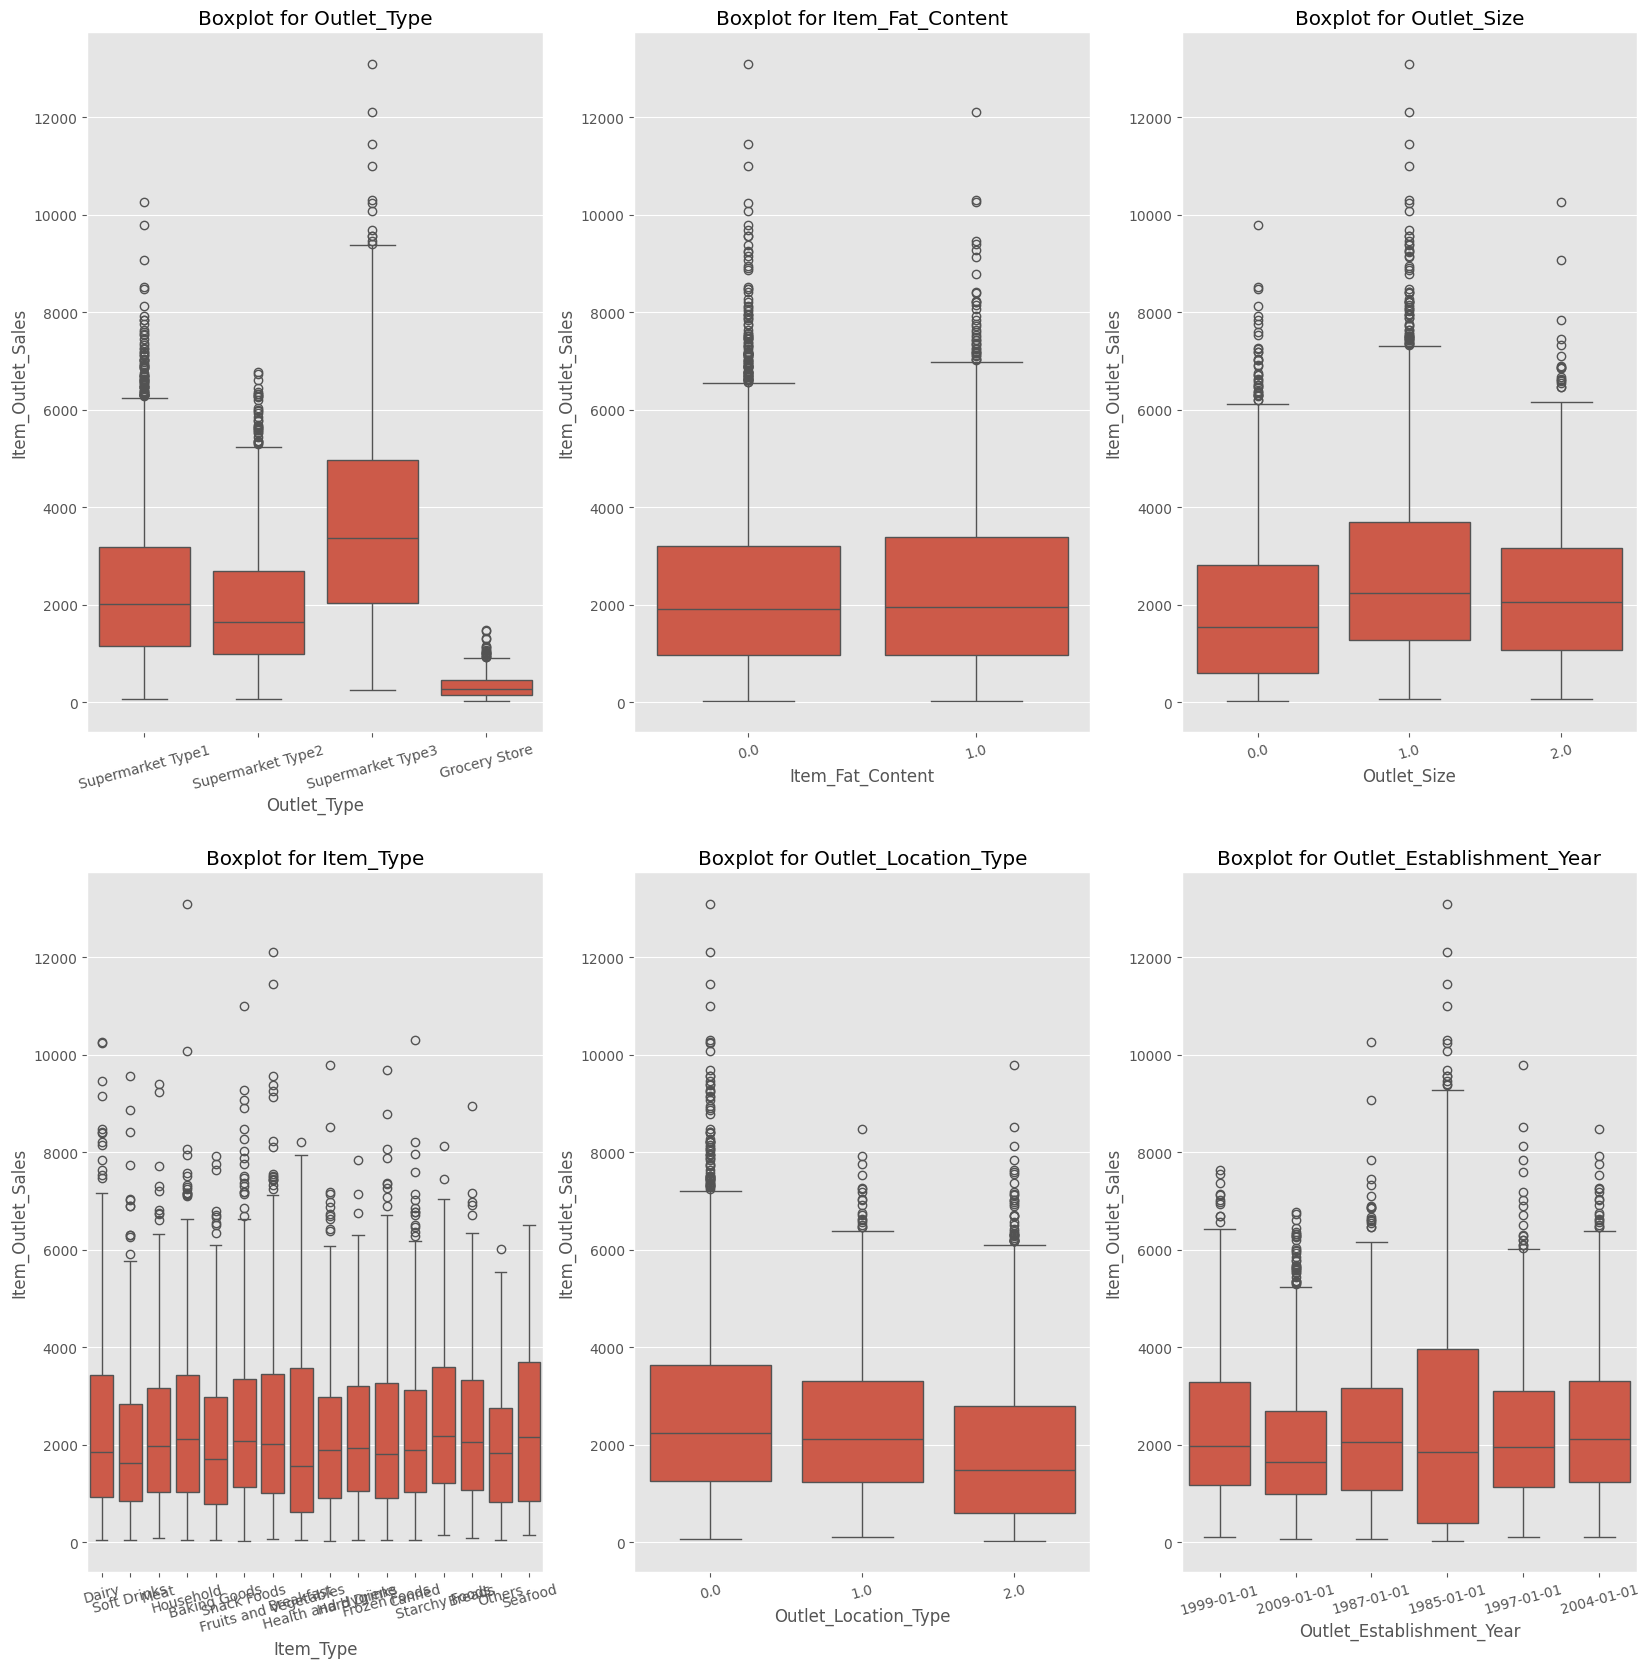

In [32]:
plt.figure(figsize=(20,20))

for i in enumerate(categorical_features):
    plt.subplot(2,3, i[0]+1)
    ax = sns.boxplot(sales, x= i[1], y = 'Item_Outlet_Sales')
    ax.set_title(f"Boxplot for {i[1]}")
    plt.xticks(rotation = 15)
plt.show()


# Multivariate Analysis

In [33]:
sales.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

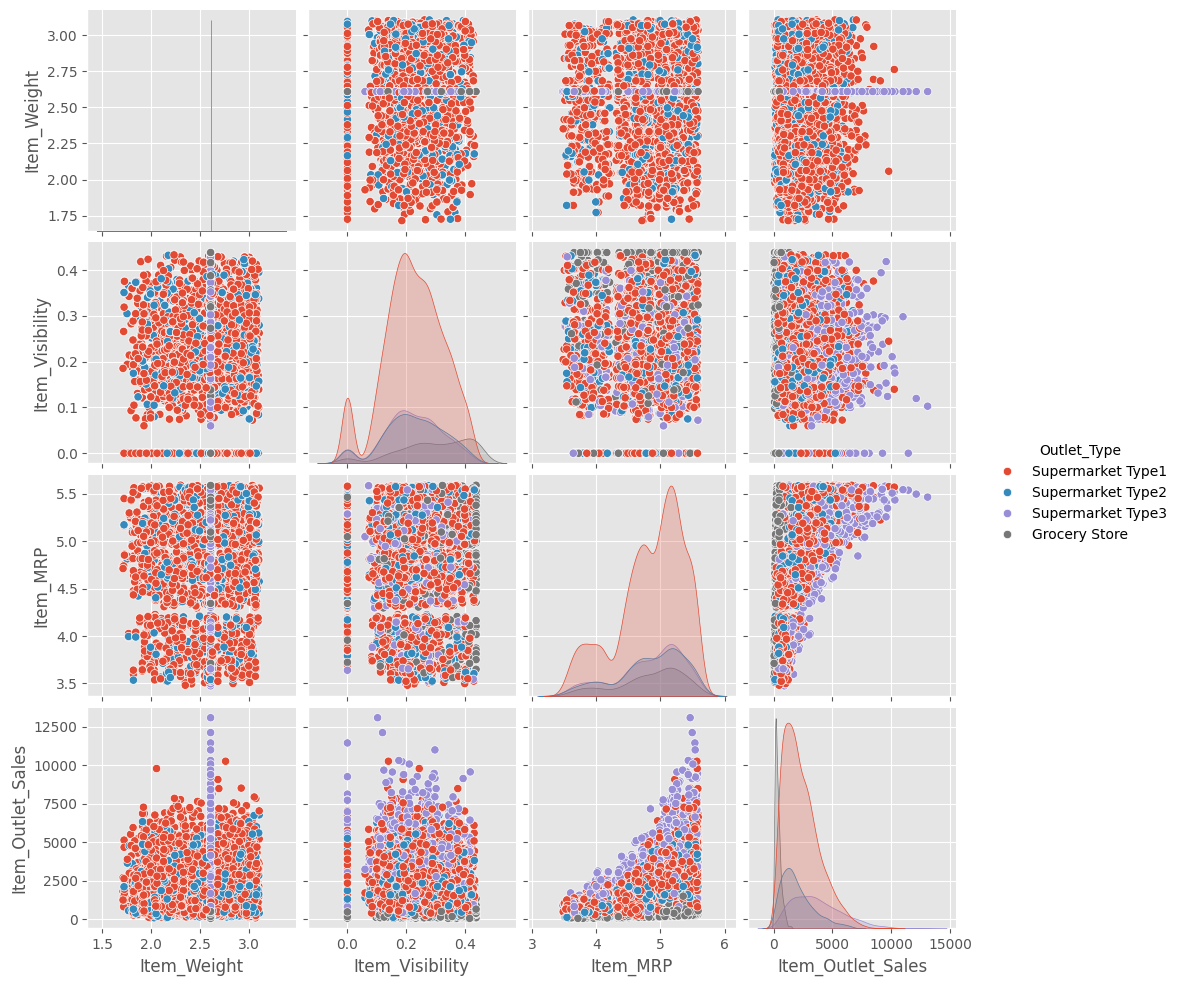

In [34]:
ax = sns.pairplot(sales, vars=['Item_Weight', 'Item_Visibility',
                        'Item_MRP','Item_Outlet_Sales'],
                    hue="Outlet_Type")

- Our features do not display a clear sense of linear relationship

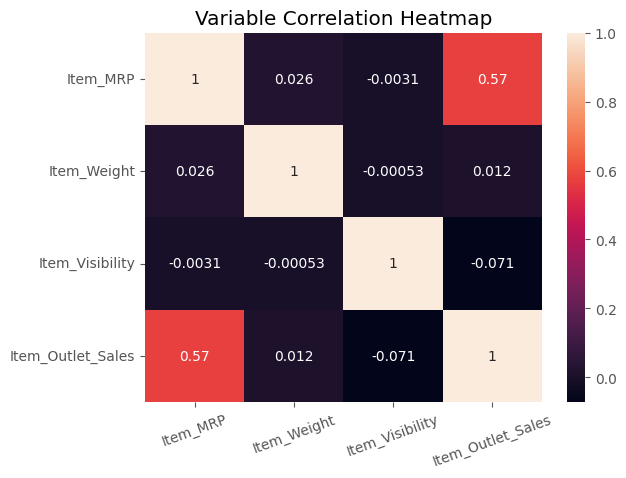

In [35]:
s_cor = sales[['Item_MRP','Item_Weight','Item_Visibility','Item_Outlet_Sales']].corr()
ax = sns.heatmap(s_cor,annot=True)
ax.set_title('Variable Correlation Heatmap')
plt.xticks(rotation = 20)
plt.show()

The data has acceptable levels of multicollinearity

# Developing Model

# Observation
- Must deal with missing value
- The numeric features need to be transformed using Function Transformer so that the distribution of data can change to a normal.
- Outling data points needs to be removed using IQR method

# Grouping Item_Type

In [36]:
val = sales['Item_Type'].value_counts()[:4].index
def grouping(x):
    if x in val:
        return x
    else:
        return "other"

sales['Item_Type'] = sales['Item_Type'].apply(grouping)
sales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,2.332144,0.0,0.126678,other,5.524692,1999-01-01,1.0,2.0,Supermarket Type1,3735.1380
1,1.934416,1.0,0.138846,other,3.897299,2009-01-01,1.0,0.0,Supermarket Type2,443.4228
2,2.917771,0.0,0.129461,other,4.960170,1999-01-01,1.0,2.0,Supermarket Type1,2097.2700
4,2.295560,0.0,0.000000,Household,4.004810,1987-01-01,2.0,0.0,Supermarket Type1,994.7052
5,2.433175,1.0,0.000000,other,3.958922,2009-01-01,1.0,0.0,Supermarket Type2,556.6088


**One hot encoding Item_Type Feature**

In [37]:
typ = pd.get_dummies(sales['Item_Type'],drop_first=True).astype(int)

In [38]:
# Concating encoded feature and removing established date and Item_Type
sales = pd.concat([sales,typ],axis=1)
sales = sales.drop(['Item_Type','Outlet_Type','Outlet_Establishment_Year'], axis=True)
sales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Fruits and Vegetables,Household,Snack Foods,other
0,2.332144,0.0,0.126678,5.524692,1.0,2.0,3735.1380,0,0,0,1
1,1.934416,1.0,0.138846,3.897299,1.0,0.0,443.4228,0,0,0,1
2,2.917771,0.0,0.129461,4.960170,1.0,2.0,2097.2700,0,0,0,1
4,2.295560,0.0,0.000000,4.004810,2.0,0.0,994.7052,0,1,0,0
5,2.433175,1.0,0.000000,3.958922,1.0,0.0,556.6088,0,0,0,1


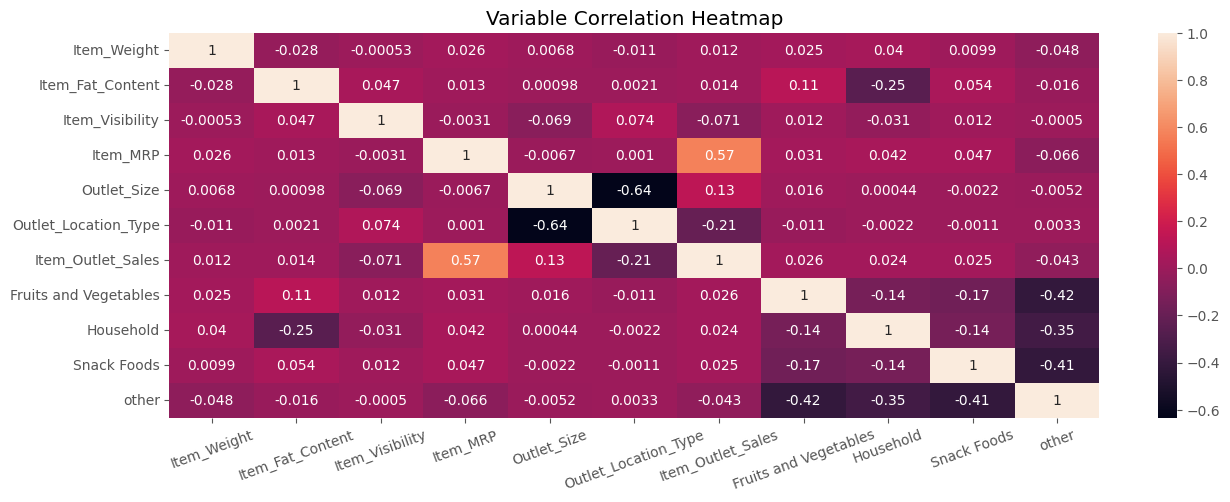

In [39]:
plt.figure(figsize=(15,5))
s_cor = sales.corr()
ax = sns.heatmap(s_cor,annot=True)
ax.set_title('Variable Correlation Heatmap')
plt.xticks(rotation = 20)
plt.show()

**Removing features to control for multicollinearity**

# Splitting data in test and train

In [40]:
x = sales[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Fruits and Vegetables','Household','Snack Foods','other']]
y = sales['Item_Outlet_Sales']

In [41]:
# Splitting testing and training data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = 101)

# Linear Regression Model

In [188]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [189]:
reg.fit(x_train,y_train)

LinearRegression()

In [190]:
reg_prd = reg.predict(x_test)
reg_prd

array([2805.62704794, 3561.99131943, 1843.65354777, ..., -347.27681336,
       1212.83782674, 2066.19562559])

In [191]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE", mean_absolute_error(y_test, reg_prd))
print("MSE", mean_squared_error(y_test, reg_prd))
print("RMSE", np.sqrt(mean_squared_error(y_test, reg_prd)))
r2_lr = r2_score(y_test, reg_prd)
print("R2 Score", r2_lr)
adj_R2 = 1-((1-r2_lr)*(1834-1)/(1834-1-10))
print("Adjusted R2 Score", adj_R2)

MAE 1058.6969328964144
MSE 1944194.087416401
RMSE 1394.3436045022765
R2 Score 0.3862755022899875
Adjusted R2 Score 0.38290893894544553


# Homoscedasticity

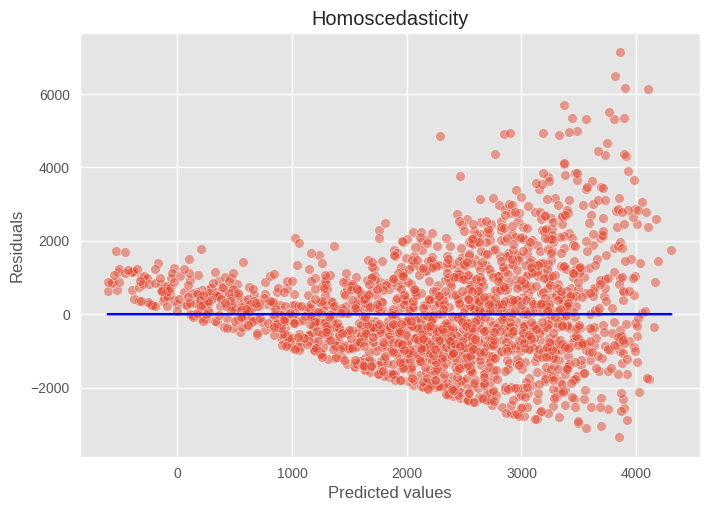

In [192]:
resid_val = y_test - reg_prd

sns.scatterplot(x=reg_prd, y=resid_val, alpha=0.5)
sns.lineplot(x=reg_prd, y=0, color='blue')
plt.title('Homoscedasticity')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

**As we see our residuals spread out as the predicted values increase but our regression model suffers from Heteroscedasticity**

# Running Pycaret best model fit

In [104]:
from pycaret.regression import *
s = setup(sales, target='Item_Outlet_Sales', session_id=123)

,Description,Value
0,Session id,123
1,Target,Item_Outlet_Sales
2,Target type,Regression
3,Original data shape,"(6113, 10)"
4,Transformed data shape,"(6113, 30)"
5,Transformed train set shape,"(4279, 30)"
6,Transformed test set shape,"(1834, 30)"
7,Numeric features,6
8,Date features,1
9,Categorical features,2


In [50]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,838.7587,1403373.8479,1183.8681,0.5309,0.5920,0.6259,1.9470
gbr,Gradient Boosting Regressor,866.4004,1407607.6288,1185.5331,0.5302,0.6460,0.7407,0.7440
rf,Random Forest Regressor,851.8827,1450058.6446,1203.4219,0.5150,0.5838,0.6208,1.7340
et,Extra Trees Regressor,887.0168,1575200.7142,1253.5296,0.4730,0.5994,0.6380,1.2080
xgboost,Extreme Gradient Boosting,905.9642,1630662.6250,1276.1396,0.4539,0.6345,0.6524,0.1570
knn,K Neighbors Regressor,960.9033,1771268.3375,1329.5954,0.4081,0.6908,0.7763,0.0440
ada,AdaBoost Regressor,1052.7523,1807080.7222,1343.7401,0.3956,0.8515,1.3467,0.1690
llar,Lasso Least Angle Regression,1045.5596,1906621.0125,1379.6338,0.3647,0.8587,1.1353,0.0310
ridge,Ridge Regression,1045.9785,1906768.8125,1379.6895,0.3647,0.8610,1.1357,0.0310
lasso,Lasso Regression,1045.5600,1906621.1500,1379.6339,0.3647,0.8587,1.1353,0.0330


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# Decision Tree Model

In [193]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()

In [194]:
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [195]:
dt_prd = dt_reg.predict(x_test)

In [196]:
print("MAE", mean_absolute_error(y_test, dt_prd))
print("MSE", mean_squared_error(y_test, dt_prd))
print("RMSE", np.sqrt(mean_squared_error(y_test, dt_prd)))
r2_dt = r2_score(y_test, dt_prd)
print("R2 Score", r2_dt)
adj_R2 = 1-((1-r2_dt)*(1834-1)/(1834-1-10))
print("Adjusted R2 Score", adj_R2)

MAE 1115.5620582333697
MSE 2523099.1197276604
RMSE 1588.4266176716067
R2 Score 0.20353232737931726
Adjusted R2 Score 0.19916333301496902


# Random Forest Regression

In [197]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [198]:
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [199]:
rf_prd = rf_model.predict(x_test)

In [200]:
print("MAE", mean_absolute_error(y_test, rf_prd))
print("MSE", mean_squared_error(y_test, rf_prd))
print("RMSE", np.sqrt(mean_squared_error(y_test, rf_prd)))
r2_rf = r2_score(y_test, rf_prd)
print("R2 Score", r2_rf)
adj_R2 = 1-((1-r2_rf)*(1834-1)/(1834-1-10))
print("Adjusted R2 Score", adj_R2)

MAE 823.4308400643403
MSE 1376800.764089129
RMSE 1173.371537105417
R2 Score 0.5653847715840792
Adjusted R2 Score 0.5630007056026425


# XgBoosting

In [201]:
from sklearn.ensemble import GradientBoostingRegressor
xgboost = GradientBoostingRegressor()

In [202]:
xgboost.fit(x_train,y_train)

GradientBoostingRegressor()

In [203]:
xg_prd = xgboost.predict(x_test)

In [204]:
print("MAE", mean_absolute_error(y_test, xg_prd))
print("MSE", mean_squared_error(y_test, xg_prd))
print("RMSE", np.sqrt(mean_squared_error(y_test, xg_prd)))
r2_xgb = r2_score(y_test, xg_prd)
print("R2 Score", r2_xgb)
adj_R2 = 1-((1-r2_xgb)*(1834-1)/(1834-1-10))
print("Adjusted R2 Score", adj_R2)

MAE 858.8957547025992
MSE 1398689.8415097597
RMSE 1182.6621840194941
R2 Score 0.5584750380691684
Adjusted R2 Score 0.5560530689965912


# CatBoost Model

In [42]:
from catboost import CatBoost
cb_model = CatBoost()

In [43]:
cb_model.fit(x_train,y_train)

Learning rate set to 0.051515
0:	learn: 1680.7533993	total: 51.9ms	remaining: 51.9s
1:	learn: 1647.8666343	total: 54.1ms	remaining: 27s
2:	learn: 1619.8184472	total: 55.5ms	remaining: 18.5s
3:	learn: 1592.3785191	total: 57.6ms	remaining: 14.4s
4:	learn: 1557.7975326	total: 59ms	remaining: 11.7s
5:	learn: 1525.0812312	total: 60.2ms	remaining: 9.98s
6:	learn: 1497.2524962	total: 61.4ms	remaining: 8.71s
7:	learn: 1466.2616758	total: 62.6ms	remaining: 7.77s
8:	learn: 1438.0367824	total: 63.8ms	remaining: 7.02s
9:	learn: 1411.7860498	total: 65ms	remaining: 6.43s
10:	learn: 1388.1236458	total: 66.3ms	remaining: 5.96s
11:	learn: 1366.4972587	total: 67.5ms	remaining: 5.55s
12:	learn: 1353.6794887	total: 68.2ms	remaining: 5.18s
13:	learn: 1340.6163718	total: 69.2ms	remaining: 4.87s
14:	learn: 1329.8138685	total: 70.3ms	remaining: 4.61s
15:	learn: 1315.3274852	total: 71.4ms	remaining: 4.39s
16:	learn: 1301.4387739	total: 72.6ms	remaining: 4.2s
17:	learn: 1286.9263425	total: 74ms	remaining: 4.04s

In [44]:
cb_prediction = cb_model.predict(x_test)

In [46]:
print("MAE", mean_absolute_error(y_test, cb_prediction))
print("MSE", mean_squared_error(y_test, cb_prediction))
print("RMSE", np.sqrt(mean_squared_error(y_test, cb_prediction)))
r2_cb = r2_score(y_test, cb_prediction)
print("R2 Score", r2_cb)
adj_R2 = 1-((1-r2_cb)*(1834-1)/(1834-1-10))
print("Adjusted R2 Score", adj_R2)

MAE 821.1539247580611
MSE 1366253.9853378544
RMSE 1168.8686775416024
R2 Score 0.5687140773017949
Adjusted R2 Score 0.5663482741054251


# Stacking LGBM Regressor

In [209]:
from lightgbm import LGBMRegressor
lgbmr = LGBMRegressor()

In [210]:
from mlxtend.regressor import StackingCVRegressor
stk_rg = StackingCVRegressor(regressors=[rf_model, xgboost, cb_model],meta_regressor=lgbmr)

In [211]:
stk_rg.fit(x_train,y_train)

Learning rate set to 0.04973
0:	learn: 1695.6388903	total: 1.51ms	remaining: 1.51s
1:	learn: 1659.8409985	total: 2.89ms	remaining: 1.44s
2:	learn: 1634.6119877	total: 3.84ms	remaining: 1.28s
3:	learn: 1606.7614675	total: 4.74ms	remaining: 1.18s
4:	learn: 1576.6403927	total: 5.64ms	remaining: 1.12s
5:	learn: 1546.0637939	total: 6.5ms	remaining: 1.08s
6:	learn: 1523.3831212	total: 7.38ms	remaining: 1.05s
7:	learn: 1497.4946535	total: 8.18ms	remaining: 1.01s
8:	learn: 1469.4319591	total: 8.98ms	remaining: 989ms
9:	learn: 1442.6517638	total: 9.76ms	remaining: 966ms
10:	learn: 1425.0260694	total: 10.5ms	remaining: 946ms
11:	learn: 1402.3355271	total: 11.3ms	remaining: 927ms
12:	learn: 1381.7581317	total: 12ms	remaining: 914ms
13:	learn: 1366.0412798	total: 12.8ms	remaining: 902ms
14:	learn: 1348.1005154	total: 13.6ms	remaining: 891ms
15:	learn: 1336.2605628	total: 14.4ms	remaining: 885ms
16:	learn: 1324.8483834	total: 15.2ms	remaining: 879ms
17:	learn: 1310.6281061	total: 16.3ms	remaining: 

StackingCVRegressor(meta_regressor=LGBMRegressor(),
                    regressors=[RandomForestRegressor(),
                                GradientBoostingRegressor(),
                                <catboost.core.CatBoost object at 0x7f56afc28820>])

In [212]:
stk_prd = stk_rg.predict(x_test)

In [213]:
print("MAE", mean_absolute_error(y_test, stk_prd))
print("MSE", mean_squared_error(y_test, stk_prd))
print("RMAE", np.sqrt(mean_absolute_error(y_test, stk_prd)))
r2_stk = r2_score(y_test, stk_prd)
print("R2 Score", r2_stk)
adj_R2 = 1-((1-r2_stk)*(1834-1)/(1834-1-10))
print("Adjusted R2 Score", adj_R2)

MAE 828.5726722873355
MSE 1405903.3064548166
RMAE 28.784938288753295
R2 Score 0.5561979608067656
Adjusted R2 Score 0.5537635009099294


# Blending LGBM Regressor

In [214]:
# First split: Split x_train and y_train into two parts
x1_train, x_val, y1_train, y_val = train_test_split(x_train, y_train, test_size=0.30, random_state=103)

In [215]:
# Training base model on x1_train
cb_model.fit(x1_train, y1_train)
rf_model.fit(x1_train, y1_train)
xgboost.fit(x1_train, y1_train)

Learning rate set to 0.048691
0:	learn: 1688.8470006	total: 4.27ms	remaining: 4.26s
1:	learn: 1659.5510527	total: 7.92ms	remaining: 3.95s
2:	learn: 1635.2100117	total: 11.3ms	remaining: 3.75s
3:	learn: 1602.4221570	total: 14.7ms	remaining: 3.66s
4:	learn: 1571.9684703	total: 16.9ms	remaining: 3.37s
5:	learn: 1544.4441573	total: 19.2ms	remaining: 3.18s
6:	learn: 1516.6674325	total: 21.4ms	remaining: 3.03s
7:	learn: 1490.7476877	total: 23.3ms	remaining: 2.89s
8:	learn: 1463.7884872	total: 25ms	remaining: 2.75s
9:	learn: 1440.1648446	total: 26.7ms	remaining: 2.65s
10:	learn: 1415.6338461	total: 28.5ms	remaining: 2.56s
11:	learn: 1394.0344105	total: 30.2ms	remaining: 2.48s
12:	learn: 1380.1747903	total: 31.5ms	remaining: 2.39s
13:	learn: 1367.3198420	total: 33.2ms	remaining: 2.34s
14:	learn: 1348.4041428	total: 34.9ms	remaining: 2.29s
15:	learn: 1329.9364174	total: 36.5ms	remaining: 2.24s
16:	learn: 1318.8910125	total: 38.3ms	remaining: 2.21s
17:	learn: 1304.8395290	total: 40ms	remaining: 

GradientBoostingRegressor()

In [216]:
# Making prediction using x_train2
Brf_prd = rf_model.predict(x_val)
Bxg_prd = xgboost.predict(x_val)
Bcb_prd = cb_model.predict(x_val)

In [217]:
meta_feature = np.column_stack((Brf_prd,Bxg_prd,Bcb_prd))

In [218]:
lgbmr.fit(meta_feature,y_val)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1284, number of used features: 3
[LightGBM] [Info] Start training from score 2286.259197


LGBMRegressor()

In [219]:
#Making prediction using base model for the accuracy test of meta model
Arf_prd = rf_model.predict(x_test)
Axg_prd = xgboost.predict(x_test)
Acb_prd = cb_model.predict(x_test)
meta_test_feature = np.column_stack((Arf_prd,Axg_prd,Acb_prd))

In [220]:
bld_prd = lgbmr.predict(meta_test_feature)

In [221]:
print("MAE", mean_absolute_error(y_test, bld_prd))
print("MSE", mean_squared_error(y_test, bld_prd))
print("RMSE", np.sqrt(mean_squared_error(y_test, bld_prd)))
r2_bld = r2_score(y_test, bld_prd)
print("R2 Score", r2_bld)
adj_R2 = 1-((1-r2_bld)*(1834-1)/(1834-1-10))
print("Adjusted R2 Score", adj_R2)

MAE 875.1956184220188
MSE 1526182.814465849
RMSE 1235.3877182754607
R2 Score 0.5182292821050554
Adjusted R2 Score 0.515586546406235
